# Hit Song Recipe Analysis: What Makes Songs Popular?

## Analysis Goals
Discover the "recipes" that make songs popular by analyzing:
1. Feature combinations that create hits
2. Genre-specific success patterns
3. Universal traits of popular songs

## Approach
Instead of just predicting popularity, we'll understand WHY songs become popular by:
- Finding sweet spots for audio features
- Identifying winning feature combinations
- Understanding genre-specific audience preferences

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8')  # Using a valid style name
sns.set_theme()  # Apply seaborn default theme
plt.rcParams['figure.figsize'] = [12, 6]

## 1. Data Loading and Hit Song Identification

Number of hit songs: 2202
Popularity threshold: 71.0


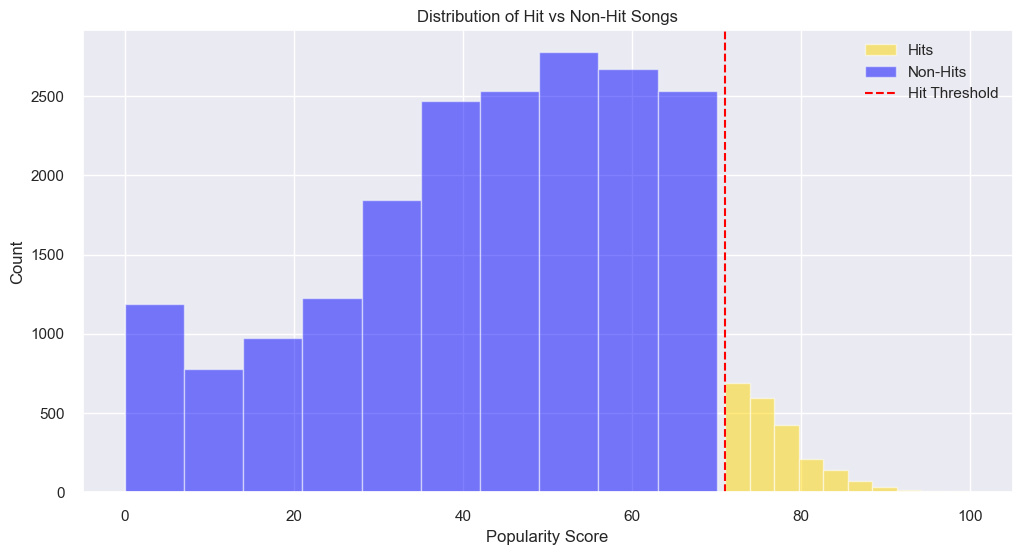

In [4]:
# Load data
sheet_url = "https://docs.google.com/spreadsheets/d/1ae96nZRL_kJWb_EEv2avxMOgGClvyc77SpY-VBqVGiY/edit#gid=1052928543"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

# Identify hit songs (top 10% by popularity)
popularity_threshold = df['track_popularity'].quantile(0.9)
hits = df[df['track_popularity'] >= popularity_threshold]
non_hits = df[df['track_popularity'] < popularity_threshold]

print(f"Number of hit songs: {len(hits)}")
print(f"Popularity threshold: {popularity_threshold}")

# Compare hit vs non-hit distributions
plt.figure(figsize=(12, 6))
plt.hist(hits['track_popularity'], alpha=0.5, label='Hits', color='gold')
plt.hist(non_hits['track_popularity'], alpha=0.5, label='Non-Hits', color='blue')
plt.axvline(popularity_threshold, color='red', linestyle='--', label='Hit Threshold')
plt.title('Distribution of Hit vs Non-Hit Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.legend()
plt.show()

## 2. Finding the Sweet Spots

Analyze optimal ranges for each feature in hit songs

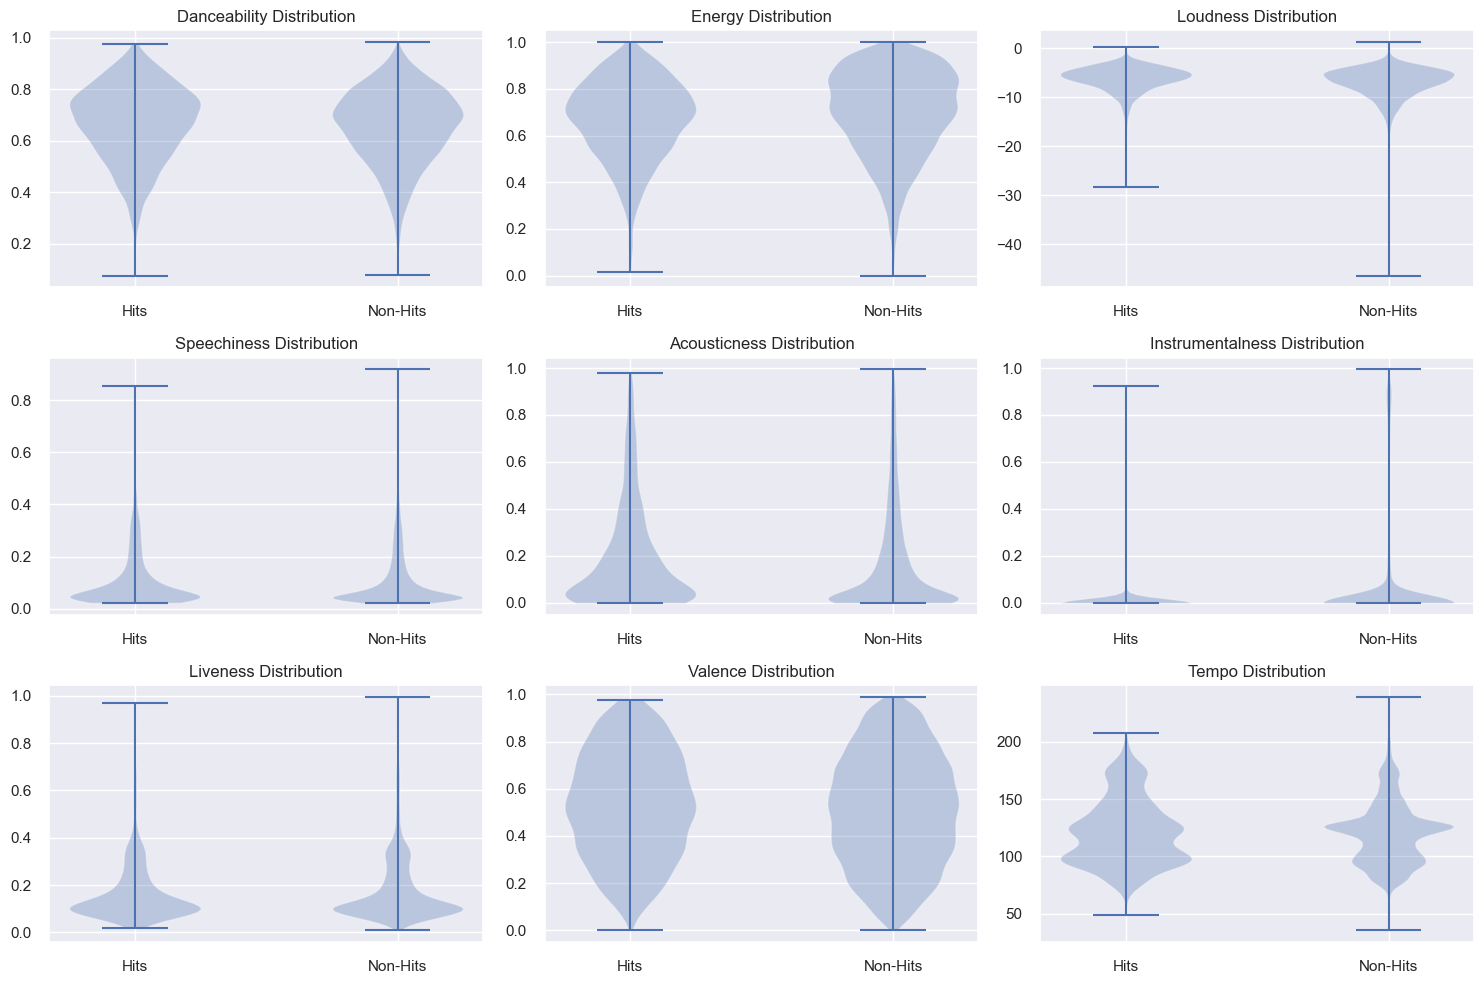


Optimal Ranges for Hit Songs:
Danceability: 0.57 - 0.78
Energy: 0.56 - 0.80
Loudness: -7.34 - -4.47
Speechiness: 0.04 - 0.13
Acousticness: 0.03 - 0.30
Instrumentalness: 0.00 - 0.00
Liveness: 0.09 - 0.21
Valence: 0.35 - 0.71
Tempo: 98.01 - 139.99


In [5]:
# Features to analyze
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create violin plots comparing hits vs non-hits
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    data = [hits[feature], non_hits[feature]]
    plt.violinplot(data)
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xticks([1, 2], ['Hits', 'Non-Hits'])
plt.tight_layout()
plt.show()

# Calculate and display optimal ranges for hits
print("\nOptimal Ranges for Hit Songs:")
for feature in audio_features:
    q25, q75 = hits[feature].quantile([0.25, 0.75])
    print(f"{feature.capitalize()}: {q25:.2f} - {q75:.2f}")

## 3. Genre-Specific Success Patterns

Hit Song Characteristics by Genre:
                track_id  danceability  energy  loudness  valence   tempo
playlist_genre                                                           
edm                   70          0.64    0.75     -5.28     0.53  123.35
latin                366          0.72    0.71     -5.30     0.63  121.68
pop                  794          0.65    0.68     -5.80     0.52  119.95
r&b                  254          0.66    0.55     -7.53     0.46  118.16
rap                  401          0.77    0.64     -6.29     0.51  125.79
rock                 317          0.54    0.71     -7.52     0.54  123.33


<Figure size 1200x600 with 0 Axes>

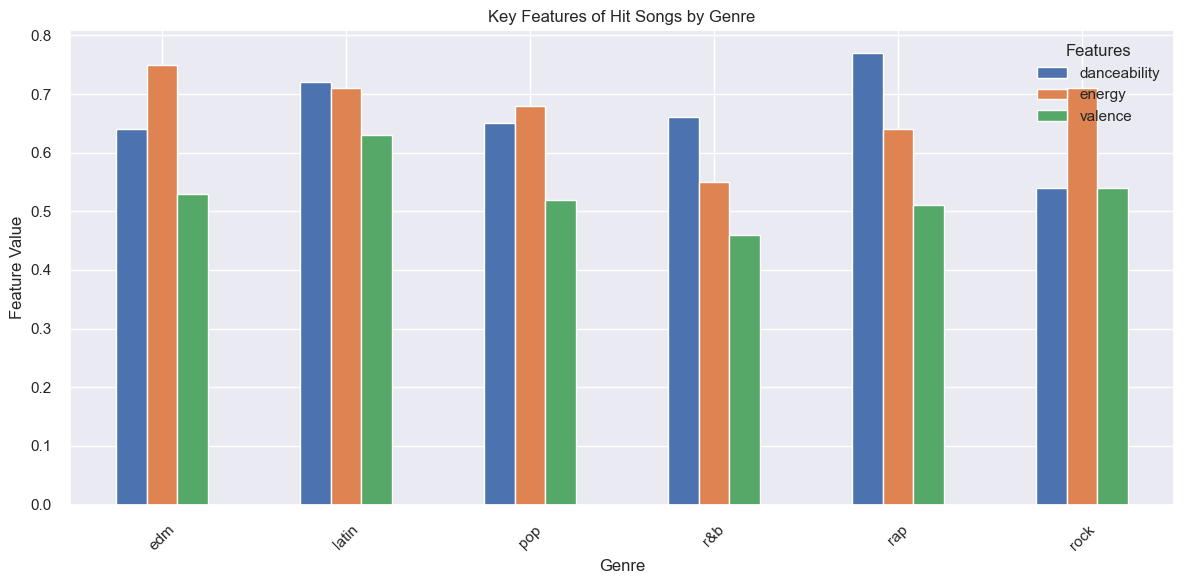

In [6]:
# Analyze hits by genre
genre_hits = hits.groupby('playlist_genre').agg({
    'track_id': 'count',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
}).round(2)

print("Hit Song Characteristics by Genre:")
print(genre_hits)

# Plot genre-specific patterns
features_to_plot = ['danceability', 'energy', 'valence']
plt.figure(figsize=(12, 6))
genre_hits[features_to_plot].plot(kind='bar')
plt.title('Key Features of Hit Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Feature Value')
plt.legend(title='Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Winning Feature Combinations

In [ ]:
# Create feature combinations
hits['energy_dance'] = hits['energy'] * hits['danceability']
hits['mood'] = hits['valence'] * hits['energy']
hits['complexity'] = (1 - hits['acousticness']) * hits['instrumentalness']

# Plot feature interaction patterns
plt.figure(figsize=(15, 5))

# Energy vs Danceability
plt.subplot(131)
plt.scatter(hits['energy'], hits['danceability'], 
            c=hits['track_popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs Danceability in Hits')

# Valence vs Energy
plt.subplot(132)
plt.scatter(hits['valence'], hits['energy'],
            c=hits['track_popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.title('Valence vs Energy in Hits')

# Acousticness vs Instrumentalness
plt.subplot(133)
plt.scatter(hits['acousticness'], hits['instrumentalness'],
            c=hits['track_popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.title('Acousticness vs Instrumentalness in Hits')

plt.tight_layout()
plt.show()

## 5. Hit Song Recipes

Identify specific combinations that lead to hits

In [ ]:
# Function to find hit recipes
def find_hit_recipe(genre_data):
    features = ['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    
    recipe = {}
    for feature in features:
        mean = genre_data[feature].mean()
        std = genre_data[feature].std()
        recipe[feature] = f"{mean:.2f} ± {std:.2f}"
    
    return recipe

# Find recipes by genre
print("Hit Song Recipes by Genre:")
for genre in hits['playlist_genre'].unique():
    genre_hits = hits[hits['playlist_genre'] == genre]
    recipe = find_hit_recipe(genre_hits)
    
    print(f"\n{genre.upper()} HITS:")
    for feature, value in recipe.items():
        print(f"{feature.capitalize()}: {value}")

# Find universal hit patterns
print("\nUNIVERSAL HIT RECIPE:")
universal_recipe = find_hit_recipe(hits)
for feature, value in universal_recipe.items():
    print(f"{feature.capitalize()}: {value}")

## 6. Success Rate Analysis

How often do songs following these recipes become hits?

In [ ]:
# Function to check if song follows recipe
def follows_recipe(song, recipe, tolerance=1.0):
    for feature, value in recipe.items():
        mean = float(value.split('±')[0])
        std = float(value.split('±')[1])
        if not (mean - tolerance * std <= song[feature] <= mean + tolerance * std):
            return False
    return True

# Calculate success rates
print("Success Rates by Genre:")
for genre in df['playlist_genre'].unique():
    genre_data = df[df['playlist_genre'] == genre]
    genre_hits = hits[hits['playlist_genre'] == genre]
    recipe = find_hit_recipe(genre_hits)
    
    # Count songs following recipe
    following_recipe = sum(genre_data.apply(lambda x: follows_recipe(x, recipe), axis=1))
    hits_following_recipe = sum(genre_hits.apply(lambda x: follows_recipe(x, recipe), axis=1))
    
    if following_recipe > 0:
        success_rate = (hits_following_recipe / following_recipe) * 100
        print(f"\n{genre.upper()}:")
        print(f"Songs following recipe: {following_recipe}")
        print(f"Hits following recipe: {hits_following_recipe}")
        print(f"Success rate: {success_rate:.1f}%")